In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
# Load the dataset
df = pd.read_csv("adult.csv")

In [4]:
print("\nFirst 5 rows:\n", df.head())


First 5 rows:
     age workclass  fnlwgt     education  education.num      marital.status  \
0  29.0   Private  280618  Some-college             10  Married-civ-spouse   
1  19.0   Private  439779  Some-college             10       Never-married   
2  28.0   Private  204734  Some-college             10  Married-civ-spouse   
3  35.0   Private  107991          11th              7       Never-married   
4  20.0   Private   54152  Some-college             10       Never-married   

          occupation   relationship   race     sex  capital.gain  \
0  Handlers-cleaners        Husband  White    Male             0   
1              Sales      Own-child  White    Male             0   
2       Tech-support           Wife  White  Female             0   
3              Sales  Not-in-family  White    Male             0   
4       Adm-clerical      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  hours-per-week  
0             0              40  U

In [5]:
print("Dataset Info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             225 non-null    float64
 1   workclass       225 non-null    object 
 2   fnlwgt          250 non-null    int64  
 3   education       225 non-null    object 
 4   education.num   250 non-null    int64  
 5   marital.status  250 non-null    object 
 6   occupation      225 non-null    object 
 7   relationship    250 non-null    object 
 8   race            250 non-null    object 
 9   sex             250 non-null    object 
 10  capital.gain    250 non-null    int64  
 11  capital.loss    250 non-null    int64  
 12  hours.per.week  250 non-null    int64  
 13  native.country  250 non-null    object 
 14  income          250 non-null    object 
 15  hours-per-week  0 non-null      float64
dtypes: float64(2), int64(5), object(9)
memory usage: 31.4+ KB
Dataset Info:
 None


In [6]:
print("\nMissing values before imputation:\n", df.isnull().sum())



Missing values before imputation:
 age                25
workclass          25
fnlwgt              0
education          25
education.num       0
marital.status      0
occupation         25
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country      0
income              0
hours-per-week    250
dtype: int64


In [ ]:
# Handling missing values
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical columns
        df[column].fillna(df[column].mode()[0], inplace=True)  # Mode imputation
    else:  # Numerical columns
        df[column].fillna(df[column].mean(), inplace=True)  # Mean imputation

In [8]:
print("\nMissing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          0
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country      0
income              0
hours-per-week    250
dtype: int64


In [16]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
               age   workclass        fnlwgt   education  education.num  \
count  250.000000  250.000000  2.500000e+02  250.000000     250.000000   
mean    37.466667    3.044000  1.820043e+05    9.340000      10.064000   
std     12.409026    1.206602  1.135650e+05    3.332992       2.413962   
min     17.000000    0.000000  2.080900e+04    0.000000       2.000000   
25%     28.000000    3.000000  1.115830e+05    8.000000       9.000000   
50%     37.466667    3.000000  1.724315e+05   10.000000      10.000000   
75%     45.000000    3.000000  2.284482e+05   11.000000      12.000000   
max     77.000000    6.000000  1.125613e+06   13.000000      16.000000   

       marital.status  occupation  relationship        race         sex  \
count      250.000000  250.000000    250.000000  250.000000  250.000000   
mean         1.784000    5.672000      1.492000    3.752000    0.640000   
std          1.289961    4.002561      1.560666    0.696013    0.480963   
min        

In [9]:
# EDA on Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns

In [10]:
# Frequency Distribution of Categorical Variables
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
   


Value counts for workclass:
workclass
Private             183
Self-emp-not-inc     16
?                    15
State-gov            13
Self-emp-inc          8
Federal-gov           8
Local-gov             7
Name: count, dtype: int64

Value counts for education:
education
HS-grad         98
Some-college    59
Bachelors       31
Assoc-acdm      12
Masters         12
11th            11
Assoc-voc        7
10th             6
12th             4
7th-8th          3
5th-6th          2
Doctorate        2
Prof-school      2
1st-4th          1
Name: count, dtype: int64

Value counts for marital.status:
marital.status
Married-civ-spouse       101
Never-married             96
Divorced                  39
Separated                  7
Widowed                    5
Married-spouse-absent      2
Name: count, dtype: int64

Value counts for occupation:
occupation
Exec-managerial      56
Other-service        31
Craft-repair         26
Sales                26
Prof-specialty       24
Adm-clerical         23
? 

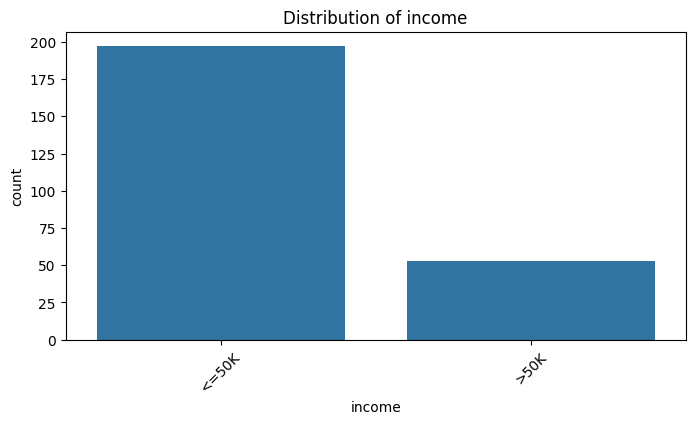

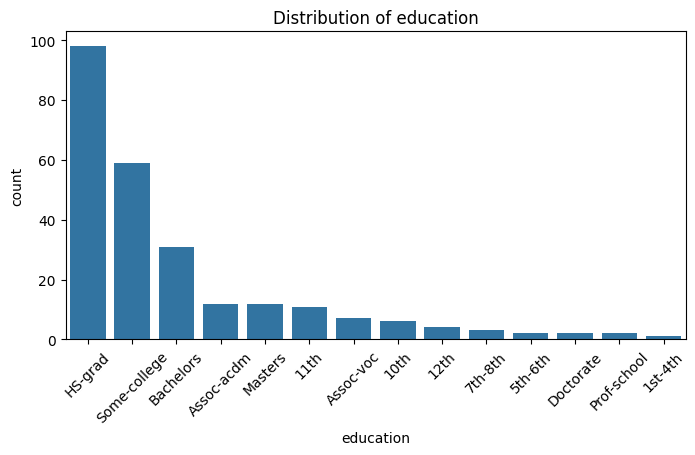

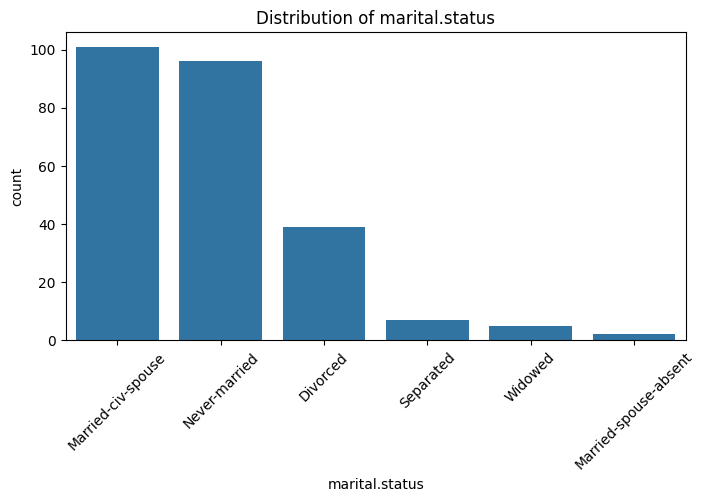

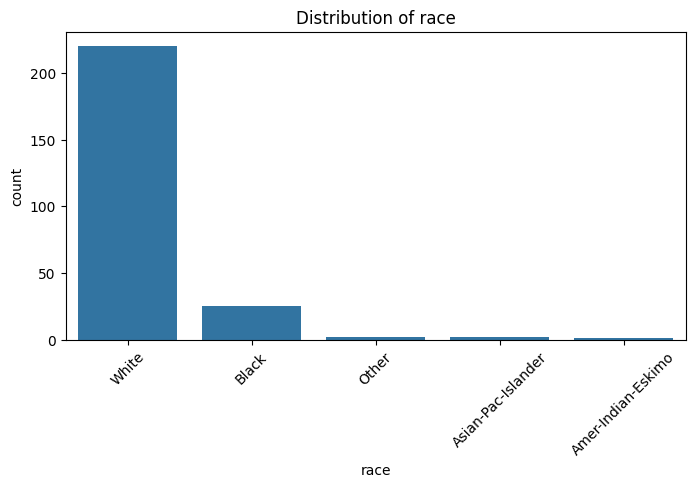

In [11]:
# Monovariate Analysis for Income, Education, Marital Status, and Race
monovariate_columns = ['income', 'education', 'marital.status', 'race']
for col in monovariate_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

In [12]:
# Encoding Categorical Variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [13]:
print("\nFirst 5 rows after encoding:\n", df.head())


First 5 rows after encoding:
     age  workclass  fnlwgt  education  education.num  marital.status  \
0  29.0          3  280618         13             10               1   
1  19.0          3  439779         13             10               3   
2  28.0          3  204734         13             10               1   
3  35.0          3  107991          1              7               3   
4  20.0          3   54152         13             10               3   

   occupation  relationship  race  sex  capital.gain  capital.loss  \
0           5             0     4    1             0             0   
1          11             3     4    1             0             0   
2          12             5     4    0             0             0   
3          11             1     4    1             0             0   
4           1             3     4    0             0             0   

   hours.per.week  native.country  income  hours-per-week  
0              40              12       0             N

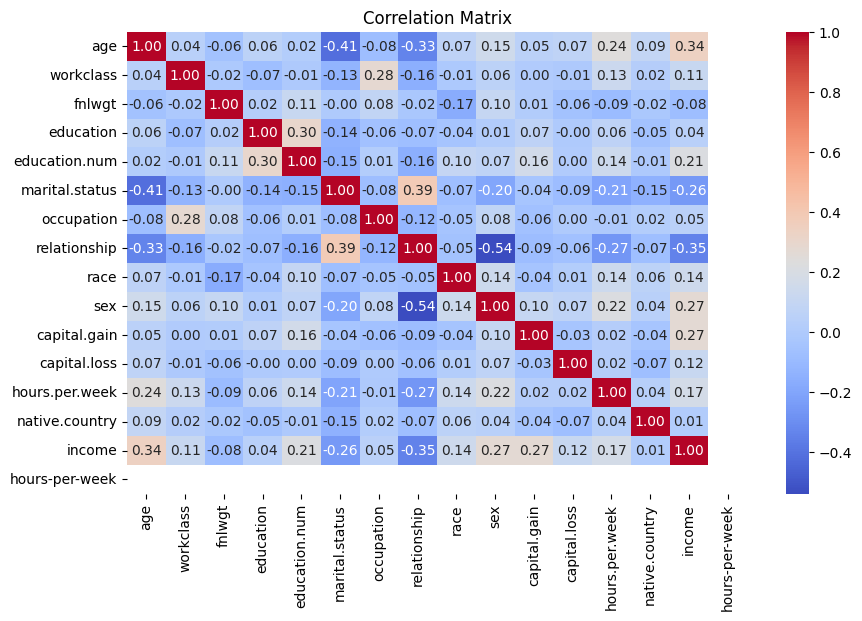

In [14]:
# Correlation heatmap (after encoding categorical variables)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

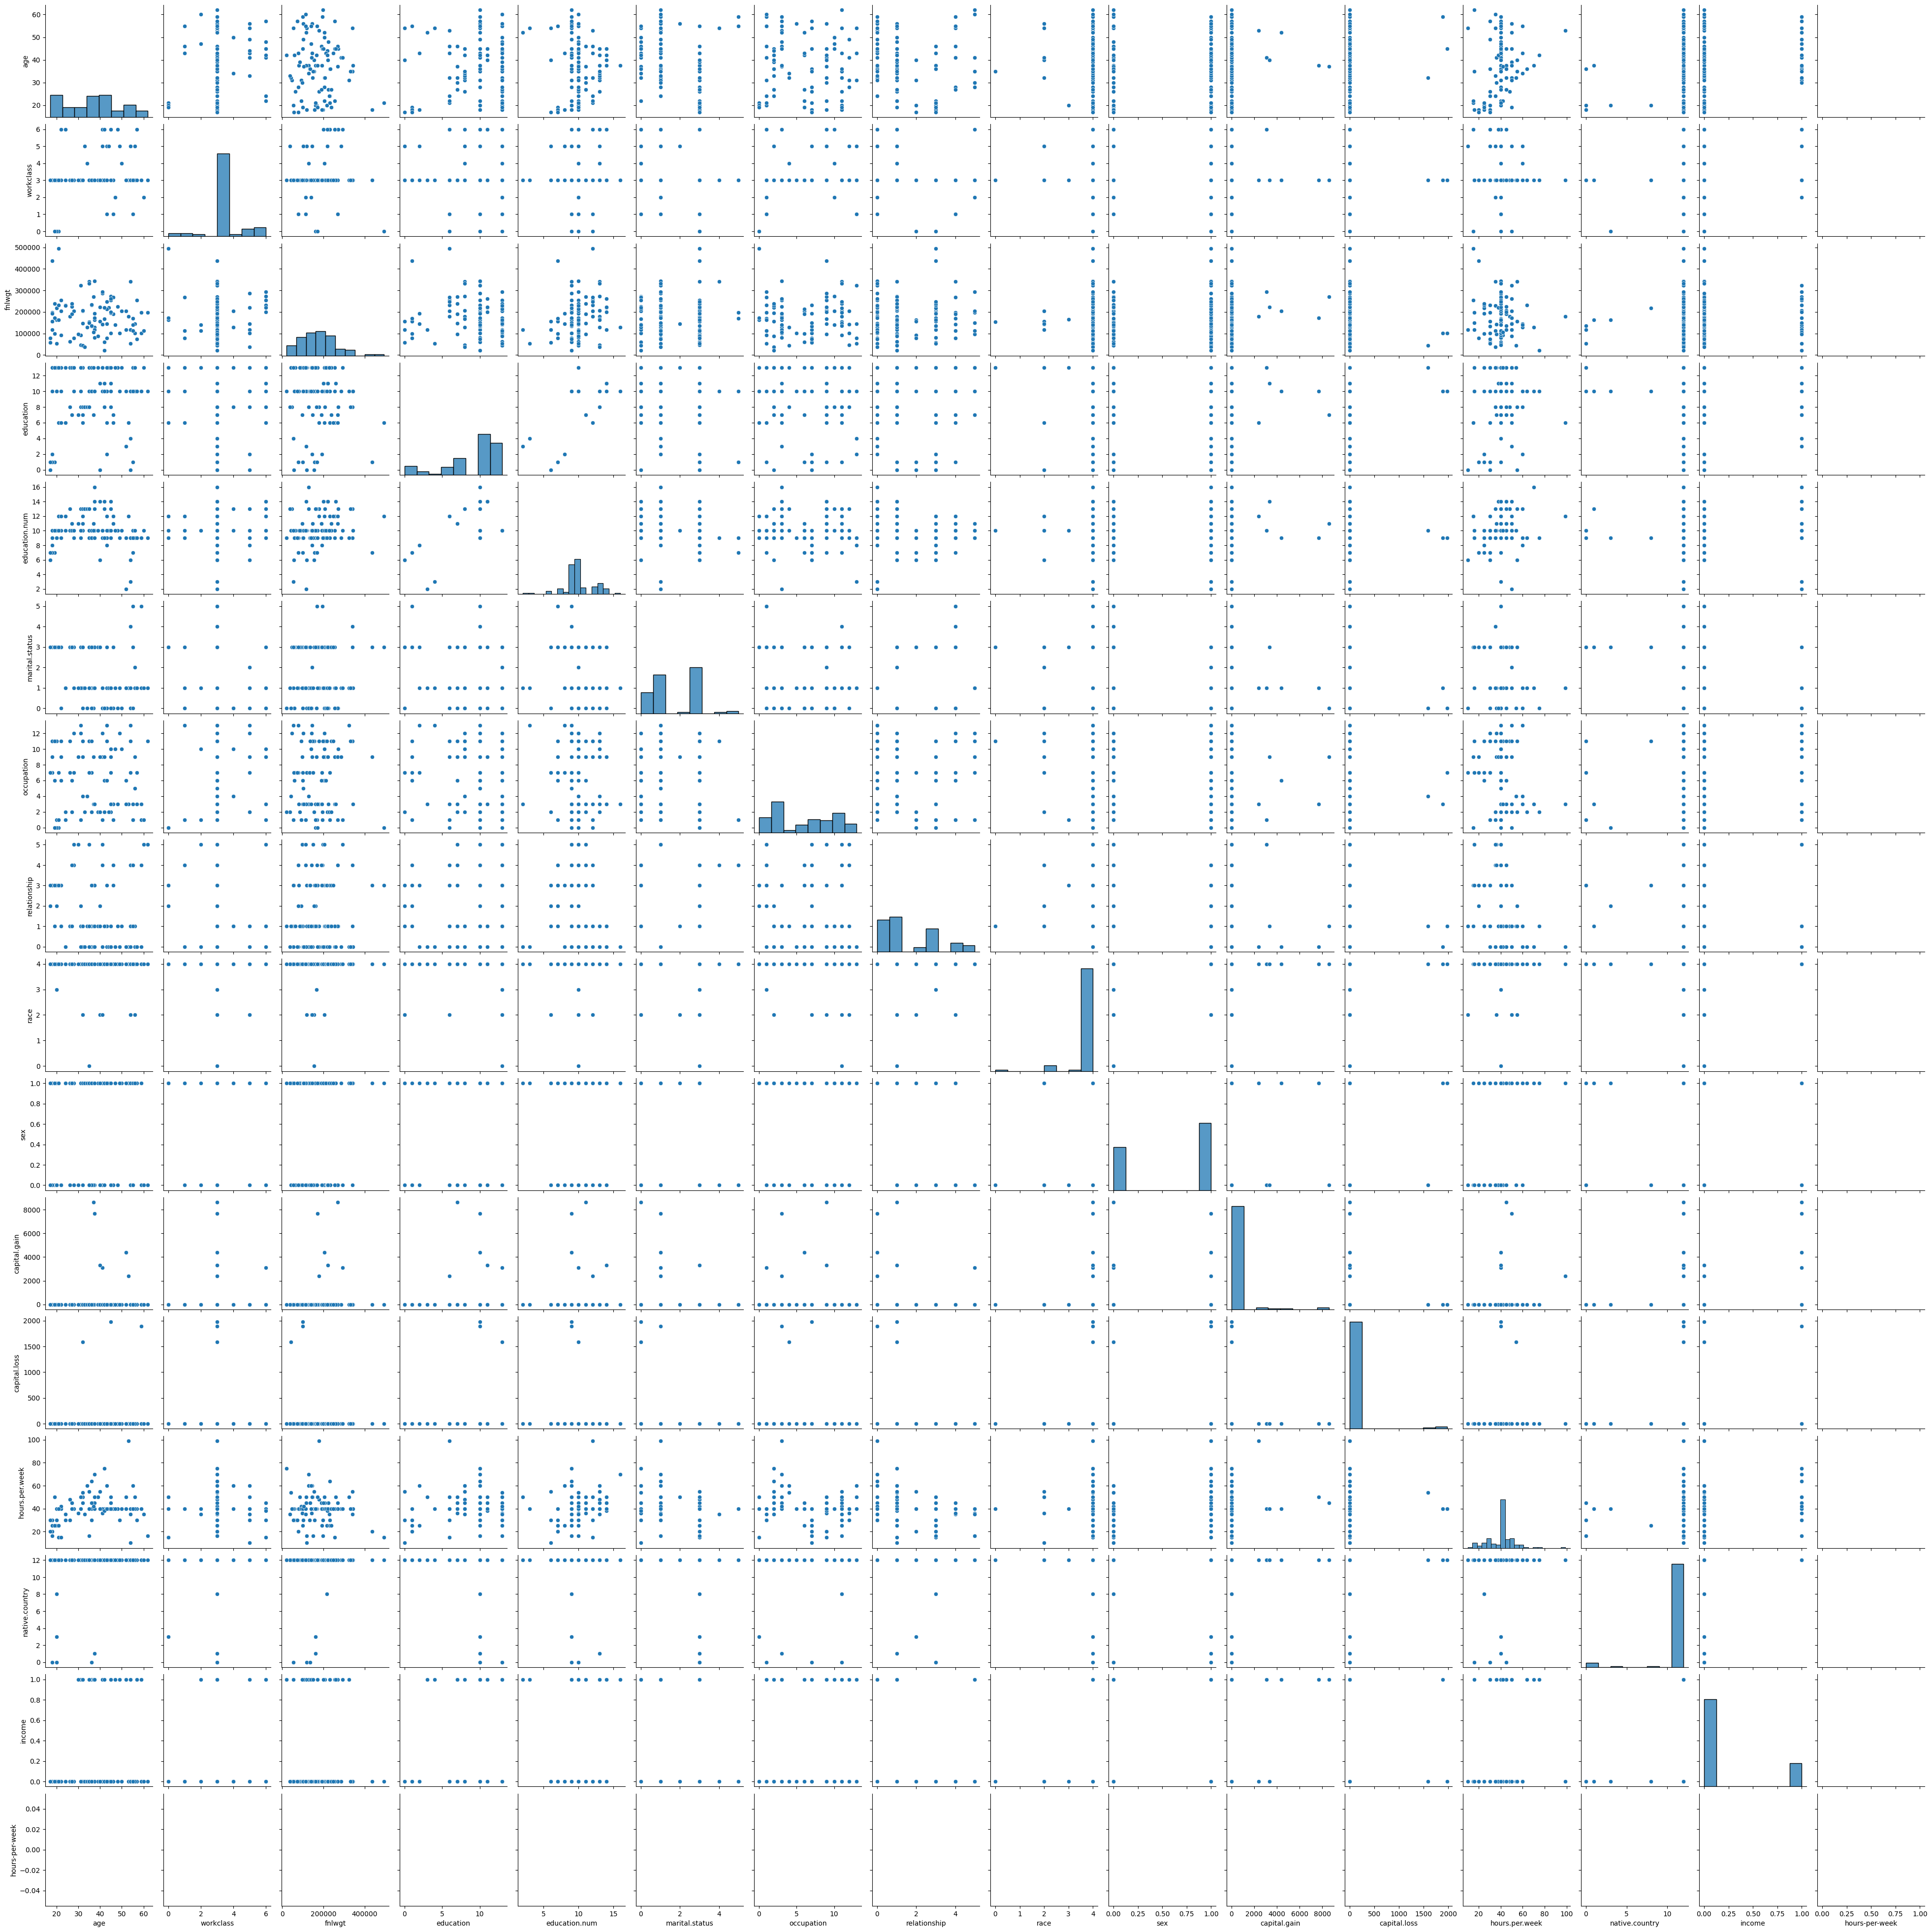

In [15]:
# Pairplot to visualize relationships
sns.pairplot(df.sample(100))  # Sampling to reduce computation time
plt.show()